# 1 Workflow to integrate the Athal1 (control samples) quantification files

#### Dataset1: Healthy - Arabidopsis (Col-0)

Cynthia Soto<br>
Fecha: 20 de Agosto 2020<br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
The data quantifications produced with HTSeq are given in absolute values. Therefore, it is necessary to transform the data to some scale that is appropriate for further analysis. In this case, I will apply the Log2 transformation to the data after plus 1 to avoid arithmetic errors.

***Workflow:***<br>
1) Explore data & get the correct format (remove or add headers; remove not informative data, etc.)<br>
2) Get basic statics & counts in zeros.<br>
3) Transform absolute counts into Log2 counts. <br>
4) Get basic statics onto Log2 values. <br>
5) Create log2 files & statistics files in cvs format for further analysis. <br>


In [7]:
import pandas as pd
import numpy as np
import os 
import glob

In [8]:
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts


In [9]:
#print(os.listdir(os.getcwd()) # list files in Dir
os.listdir(os.getcwd())

['all_log2_3_ceros.csv',
 'all_log2_6_ceros.csv',
 'SRR6283145',
 'all_genesIDs_3cero',
 'SRR3383640_Log2.csv',
 'SRR6283144',
 'athal_gene_name.csv',
 'SRR3383821_Log2.csv',
 'all_log2_counter_cero.csv',
 'all_log2_dropped5ceros.csv',
 'SRR3383640',
 'SRR3383782_Log2.csv',
 'SRR6283145_Log2.csv',
 'wgcna_dataset1_thaliana_sana',
 'all_log2_dropped7ceros.csv',
 'all_log2_dropped4ceros.csv',
 'SRR3383641_Log2.csv',
 'SRR3383783_Log2.csv',
 'all_log2_7_ceros.csv',
 'SRR3383783',
 'all_genesIDs_4cero',
 'all_log2_dropped6ceros.csv',
 'SRR3383822_Log2.csv',
 'SRR3383782',
 'all_genesIDs_cero',
 'all_log2_8_ceros.csv',
 'SRR3383822',
 'all_log2_dropped8ceros.csv',
 'all_log2_5_ceros.csv',
 'all_log2_4_ceros.csv',
 'SRR6283144_Log2.csv',
 'SRR3383641',
 'all_genesIDs_7cero',
 'all_genesIDs_5cero',
 'all_genesIDs_6cero',
 'all_log2_dropped3ceros.csv',
 'SRR3383821']

In [10]:
#for file in glob.glob("SRR*"):
#    print(file)

### Here, are created two relevant data files:
<ol>
<li>The log2 transformated values: *_Log2.csv </li>
<li>The basic stats about the data distributions: *_stats.csv</li>
</ol>

In [11]:
## TRANSFORM values from absolute to log2
## Take in account to remove rows with statistic data produced by the quantification tool or meta-data that are not relevant in this point
## It is assumed that files contains just "Genes and Counts"
for file in glob.glob("SRR*"):
    #print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    # Add column-names
    try:
        df.columns = ["Genes","Counts"]
        #print(df.head(3))
        #print(df.shape)
        #print(df.tail(5))
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))
        ## Plus 1 to avoid arithmetical error in Log2 transformation (avoid error div/0)
        df["Counts"] += 1
        ## Apply Log2 numpy function to absolute values and add a column
        df['log2_value'] = np.log2(df['Counts'])
        #print(df.head(3))
        ## CREATE NEW file_Log2.csv
        #df.to_csv(str(file)+'_Log2.csv', sep='\t', index=True)
        
        ## check zero values across genes based on abs.val and log2.val to add to the basic stats df
        genes_in_cero = df.isin([0]).sum()
        #print(genes_in_cero)
        ## CREATE NEW file with basic statistics *_stats.csv
        df_stats=df.describe()
        #print(df_stats.columns)
        df_stats.loc['Zeros'] = [genes_in_cero['Counts'],genes_in_cero['log2_value']]
        # adding a row
        df_stats.loc['sample'] = [file, file]               # adding a row
        #print(df_stats)       # print(df_stats.columns)
        #df_stats.to_csv('../../../athal1_stats/'+str(file)+'_stats.csv', sep='\t')
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"

In [12]:
print(str(os.getcwd()))
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/athal1_stats/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
    s_path=os.getcwd()
    print(s_path)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts
Directory changed


### Here all stats files are integrated in one file to plot it
Important note: when re-running this piece of code be sure to erase the **allsample_stats.csv** file from your work directory before running again

In [13]:
bfirst_file=True
for file in glob.glob("*_stats.csv"):
    print(file)
    df_tmp=pd.read_csv(file, sep='\t', header=None, index_col=False)
    #print(df_tmp)
    #df_tmp.drop(df_tmp.index[:0], inplace=True)
    # drop index 0 and 1 -- rows
    #print(df_tmp)
    df = df_tmp.T
    df.drop(df.index[:1], inplace=True)
    # drop index 0 (somelike headers) -- rows
    if bfirst_file==True:
        df_all=df
        bfirst_file=False
        #print(df_all)
    else:
        df_all=df_all.append(df)
        #print(df_all)
        pass
    
print(df_all)
df_all.to_csv('allsample_stats.csv', sep='\t', header=None, index=None)

SRR6283145_stats.csv
SRR3383783_stats.csv
SRR3383641_stats.csv
SRR3383782_stats.csv
SRR3383640_stats.csv
SRR3383821_stats.csv
SRR6283144_stats.csv
SRR3383822_stats.csv
            0        1                   2                   3    4    5  \
1      Counts  27655.0   633.6507322364853  2953.7515375596795  1.0  1.0   
2  log2_value  27655.0   5.307407306326486   4.182176471984372  0.0  0.0   
1      Counts  27655.0   453.5218224552522   3224.049552321334  1.0  1.0   
2  log2_value  27655.0   4.941991419748094  3.8915038468000707  0.0  0.0   
1      Counts  27655.0   717.3532815042488    3764.29342521545  1.0  1.0   
2  log2_value  27655.0  5.6200377131937085  4.2069014702594725  0.0  0.0   
1      Counts  27655.0   955.2743807629723   7136.475185768917  1.0  2.0   
2  log2_value  27655.0   5.701391209902577   4.242752919097512  0.0  1.0   
1      Counts  27655.0    348.664328331224  1860.4692499293658  1.0  1.0   
2  log2_value  27655.0   4.919338996809231   3.791072442387742  0.0  0.0

In [14]:
#set columns to apply filters by name
df_all.columns = ['Metric','count','mean','std','min','25%','50%','75%','max','Zeros','sample']

In [16]:
## Filter data for plotting the log2 statistics
is_log2=df_all['Metric']=='log2_value'
#print(is_log2)
df_plot=df_all[is_log2] #.round(decimals=3)
print(df_plot)

       Metric    count                mean                 std  min  25%  \
2  log2_value  27655.0   5.307407306326486   4.182176471984372  0.0  0.0   
2  log2_value  27655.0   4.941991419748094  3.8915038468000707  0.0  0.0   
2  log2_value  27655.0  5.6200377131937085  4.2069014702594725  0.0  0.0   
2  log2_value  27655.0   5.701391209902577   4.242752919097512  0.0  1.0   
2  log2_value  27655.0   4.919338996809231   3.791072442387742  0.0  0.0   
2  log2_value  27655.0   5.118317463224261   3.943576312846421  0.0  0.0   
2  log2_value  27655.0   5.269930743616318   4.197586969773496  0.0  0.0   
2  log2_value  27655.0   4.671514512940085   3.705816778099094  0.0  0.0   

                  50%                75%                 max   Zeros  \
2   6.189824558880018  8.912889336229961  17.106450481091255  7688.0   
2   5.700439718141092  8.247927513443585  18.268208444509813  7627.0   
2   6.727920454563199  9.197216693110052  18.265074740410657  7039.0   
2  6.7414669864011465  9.24

**Data type conversion**

In [17]:
df_plot.dtypes
#df_plot["mean"] = df_plot['mean'].astype('float')
#df_plot.dtypes
# using apply method to get str to numeric dtype
df_plot[['mean','std','25%','50%','75%','max','Zeros']] = df_plot[['mean','std','25%','50%','75%','max','Zeros']].apply(pd.to_numeric)
print(df_plot.dtypes)
df_plot=df_plot.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
df_plot

Metric     object
count      object
mean      float64
std       float64
min        object
25%       float64
50%       float64
75%       float64
max       float64
Zeros     float64
sample     object
dtype: object


/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sample,mean,std,25%,50%,75%,max,Zeros
2,SRR6283145,5.307,4.182,0.0,6.190,8.913,17.106,7688.0
2,SRR3383783,4.942,3.892,0.0,5.700,8.248,18.268,7627.0
2,SRR3383641,5.620,4.207,0.0,6.728,9.197,18.265,7039.0
2,SRR3383782,5.701,4.243,1.0,6.741,9.248,19.334,6888.0
2,SRR3383640,4.919,3.791,0.0,5.728,8.140,17.227,7396.0
2,SRR3383821,5.118,3.944,0.0,5.954,8.459,17.179,7360.0
2,SRR6283144,5.270,4.198,0.0,6.000,8.877,18.067,7700.0
2,SRR3383822,4.672,3.706,0.0,5.358,7.814,16.796,7702.0


### Plot quantification metrics 

In [18]:
import matplotlib.pyplot as plt
plt.style.available[:10]    
# 'Solarize_Light2','_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale',  'seaborn'
plt.style.use('classic')

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


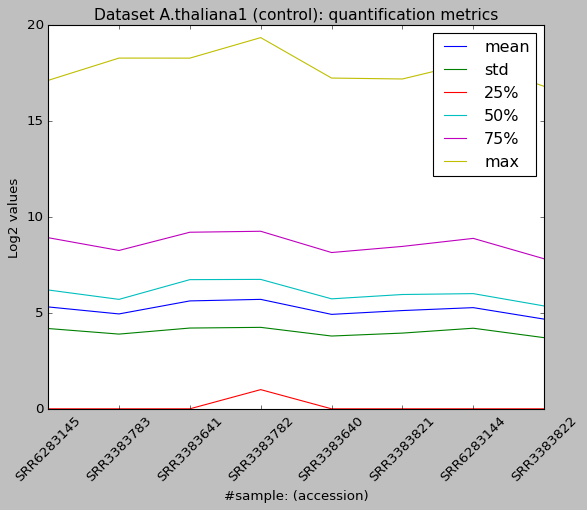

<Figure size 640x480 with 0 Axes>

In [19]:
df_plot.plot(x='sample', y=['mean','std','25%','50%','75%','max'], kind='line')   #kind='lines,box,area'
plt.xlabel('#sample: (accession)',color='black')
plt.xticks(rotation=45)
plt.ylabel('Log2 values',color='black')
plt.title('Dataset A.thaliana1 (control): quantification metrics', fontsize=14)
plt.legend()
plt.show()
plt.savefig("athal1_basic_statics.png")

***To plot the lines in the chart (ceros across samples) first need to merge sample*** <br>
Go to notebook 3_merge* file before run this code 

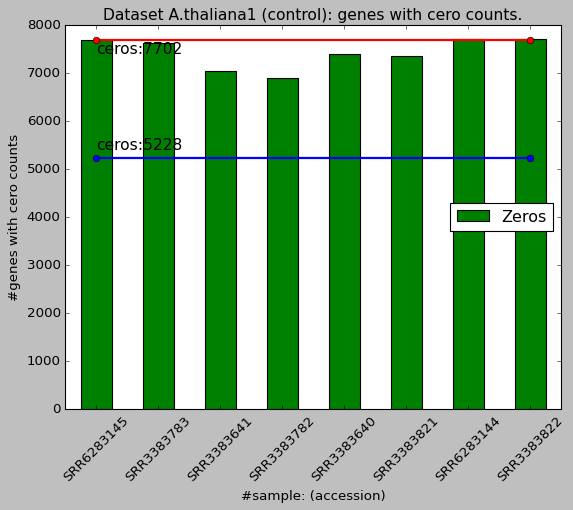

<Figure size 640x480 with 0 Axes>

In [26]:
# More plots
df_plot.plot(x='sample', y='Zeros', kind='bar', color='green')
plt.xlabel('#sample: (accession)',color='black')
plt.xticks(rotation=45)
plt.ylabel('#genes with cero counts', color='black')
plt.title('Dataset A.thaliana1 (control): genes with cero counts.', fontsize=14)
plt.legend(loc=7)

## add arbitrary lines to canvas
plt.plot([0, 7], [7688, 7688], 'k-', lw=2, color='red',marker = 'o')
plt.plot([0, 7], [5228, 5228], 'k-', lw=2, color='blue',marker = 'o')
plt.text(0, 7400, "ceros:7702",fontsize=14)
plt.text(0, 5400, "ceros:5228",fontsize=14)

plt.show()
plt.savefig("athal1_zeroLog2_counts.png")